In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import librosa
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from itertools import cycle

sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

In [3]:
y_main, sr = librosa.load('../models/generated_samples/main_bass.wav')
y_mel, sr_mel = librosa.load('../models/generated_samples/new_librosa-mel.wav')
y_stft, sr_stft = librosa.load('../models/generated_samples/new_librosa-stft.wav')
print(f'y_main: {y_main[:10]}')
print(f'y_mel: {y_mel[:10]}')
print(f'y_spectro: {y_stft[:10]}')

print('---')

print(f'shape y_main: {y_main.shape}')
print(f'shape y_mel: {y_mel.shape}')
print(f'shape y_spectro: {y_stft.shape}')

print('---')

print(f'sr: {sr}')
print(f'sr_mel: {sr_mel}')
print(f'sr_spectro: {sr_stft}')

y_main: [-1.3996575e-08  1.2375902e-08  4.3270838e-08  2.8781461e-08
 -4.2559556e-10 -2.0574107e-09  2.2642643e-08  7.1586044e-09
 -1.2929020e-08  7.9028510e-08]
y_mel: [0.00510585 0.00570798 0.00622272 0.00670278 0.00711811 0.00745797
 0.00775802 0.0080049  0.00820947 0.00841725]
y_spectro: [-1.1920929e-07  0.0000000e+00  0.0000000e+00  0.0000000e+00
 -1.1920929e-07 -1.1920929e-07  0.0000000e+00  0.0000000e+00
 -1.1920929e-07  0.0000000e+00]
---
shape y_main: (88200,)
shape y_mel: (88064,)
shape y_spectro: (88064,)
---
sr: 22050
sr_mel: 22050
sr_spectro: 22050


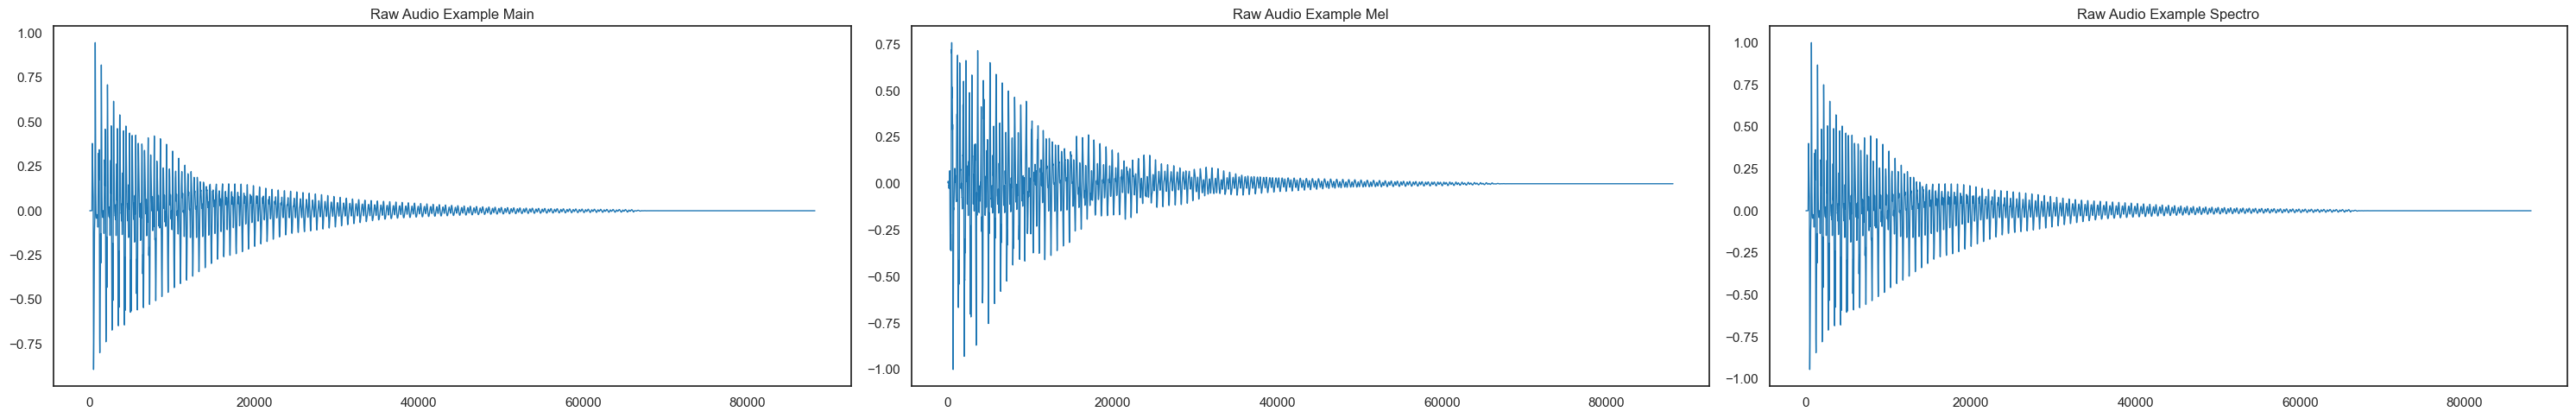

In [4]:
fig, axs = plt.subplots(1, 3, figsize=(30, 5))

pd.Series(y_main).plot(ax=axs[0],
                        lw=1,
                        title='Raw Audio Example Main',
                        color=color_pal[0])

pd.Series(y_mel).plot(ax=axs[1],
                        lw=1,
                        title='Raw Audio Example Mel',
                        color=color_pal[0])

pd.Series(y_stft).plot(ax=axs[2],
                        lw=1,
                        title='Raw Audio Example Spectro',
                        color=color_pal[0])

plt.tight_layout()
plt.show()

In [6]:
D_main = librosa.stft(y_main)
D_mel = librosa.stft(y_mel)
D_stft = librosa.stft(y_stft)

S_db_main = librosa.amplitude_to_db(np.abs(D_main), ref=np.max)
S_db_mel = librosa.amplitude_to_db(np.abs(D_mel), ref=np.max)
S_db_stft = librosa.amplitude_to_db(np.abs(D_stft), ref=np.max)

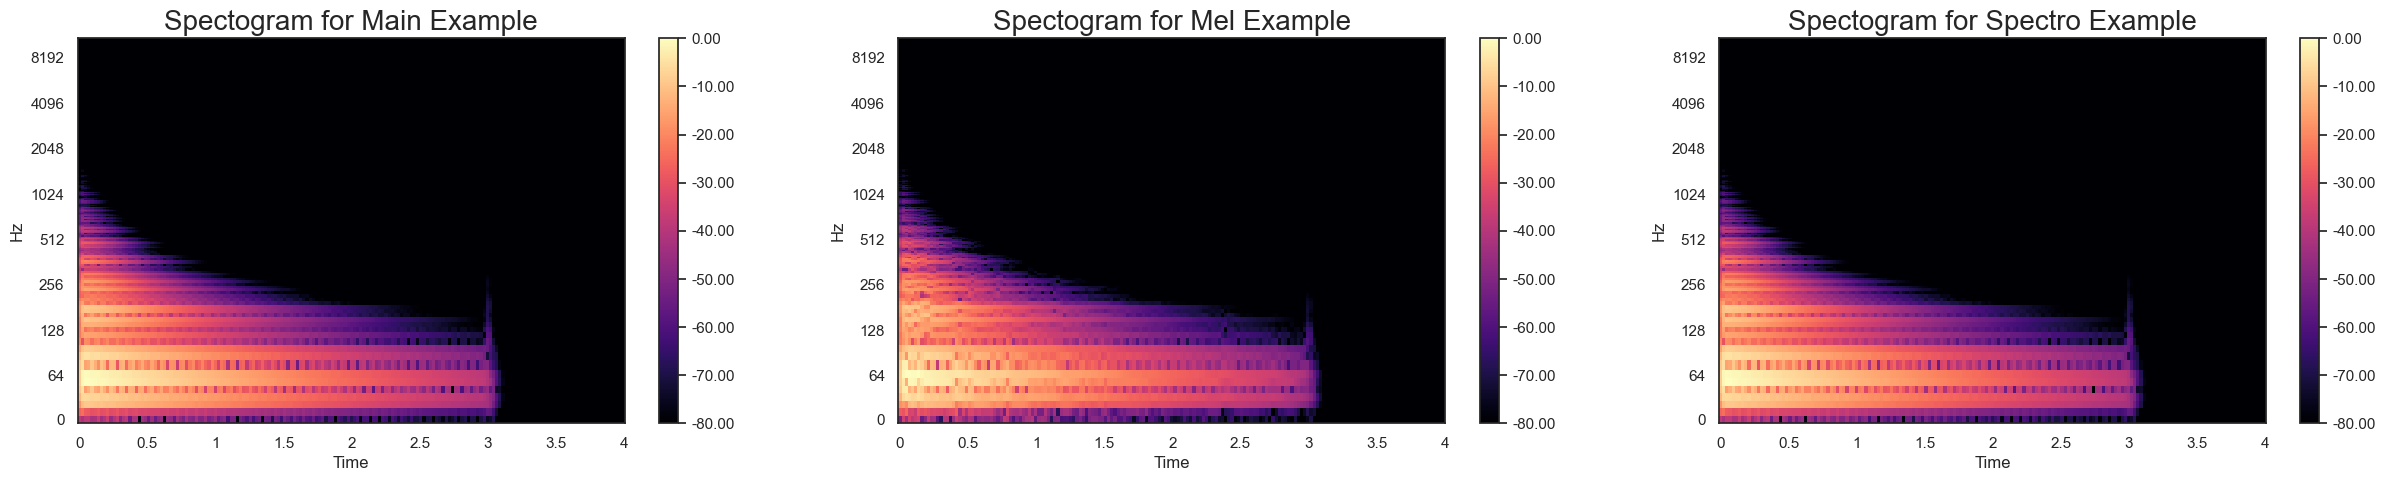

In [7]:
fig, axs = plt.subplots(1, 3, figsize=(30, 5))

img = librosa.display.specshow(S_db_main,
                              x_axis='time',
                              y_axis='log',
                              ax=axs[0])
axs[0].set_title('Spectogram for Main Example', fontsize=20)
fig.colorbar(img, ax=axs[0], format=f'%0.2f')

img = librosa.display.specshow(S_db_mel,
                              x_axis='time',
                              y_axis='log',
                              ax=axs[1])
axs[1].set_title('Spectogram for Mel Example', fontsize=20)
fig.colorbar(img, ax=axs[1], format=f'%0.2f')


img = librosa.display.specshow(S_db_stft,
                              x_axis='time',
                              y_axis='log',
                              ax=axs[2])
axs[2].set_title('Spectogram for Spectro Example', fontsize=20)
fig.colorbar(img, ax=axs[2], format=f'%0.2f')


plt.show()